# Lab 1: Real-World Data Cleaning, Transformation and Visualization

In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
# Load dataset:
dataset=sns.load_dataset("titanic")
df=pd.DataFrame(dataset)

# Initial dataset shape
df.shape


(891, 15)

In [31]:
# Identify missing values
df.isnull().sum().sort_values(ascending=True)

survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
embarked         2
embark_town      2
age            177
deck           688
dtype: int64

In [10]:
# Use the mean method in cleaning data
clean_df=df
clean_df["age"]=df["age"].fillna(df["age"].mean())

# Use deletion for cleaning missing data left
clean_df=df.dropna()

# current dataset shape
print(clean_df.shape)

clean_df.isnull().sum()




(201, 15)


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [91]:
# normalize data
df_columns=clean_df
numeric_data=["survived","pclass","age","sibsp","parch","fare"]
normalize_data=preprocessing.normalize(clean_df[numeric_data])
df_columns[numeric_data]=normalize_data


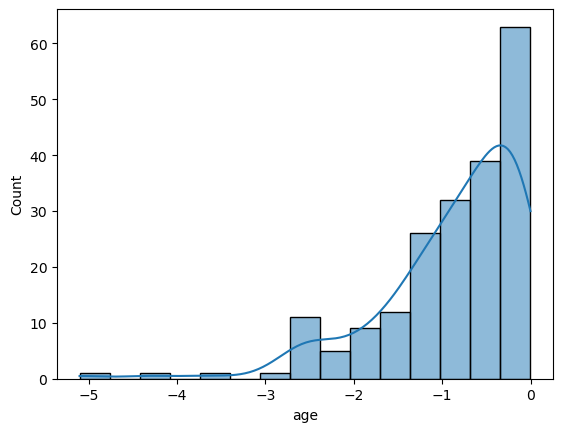

In [92]:
log_scale=np.log(df_columns["age"])
sns.histplot(log_scale,kde=True)

plt.show()

In [93]:
# Feature engineering
clean_df["Family_Size"]=clean_df["sibsp"]+clean_df["parch"]


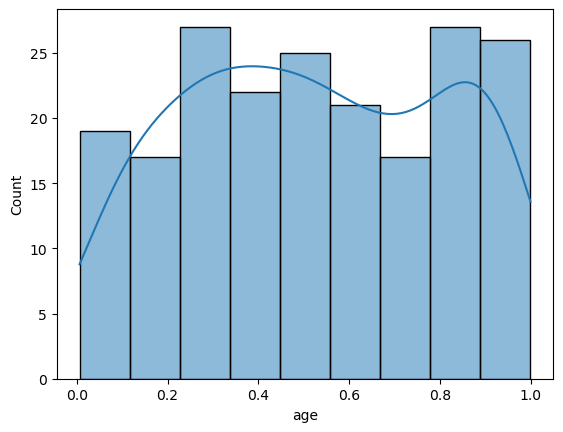

In [94]:
# Histogram of the age distribution of passengers
age_distribution=sns.histplot(clean_df["age"],kde=True)
plt.show()

In [95]:
#Box plot to compare fares


C:\Users\test\AppData\Local\Temp\ipykernel_13352\4046648956.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_df.corr(),annot=True, cmap="YlGnBu")


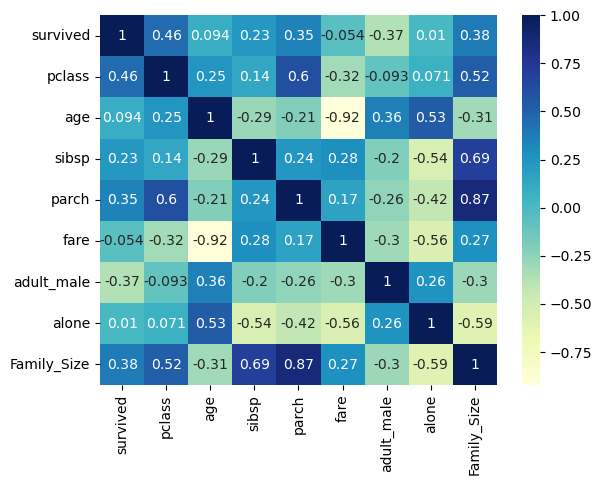

In [96]:
# Heatmap
sns.heatmap(clean_df.corr(),annot=True, cmap="YlGnBu")
plt.show()

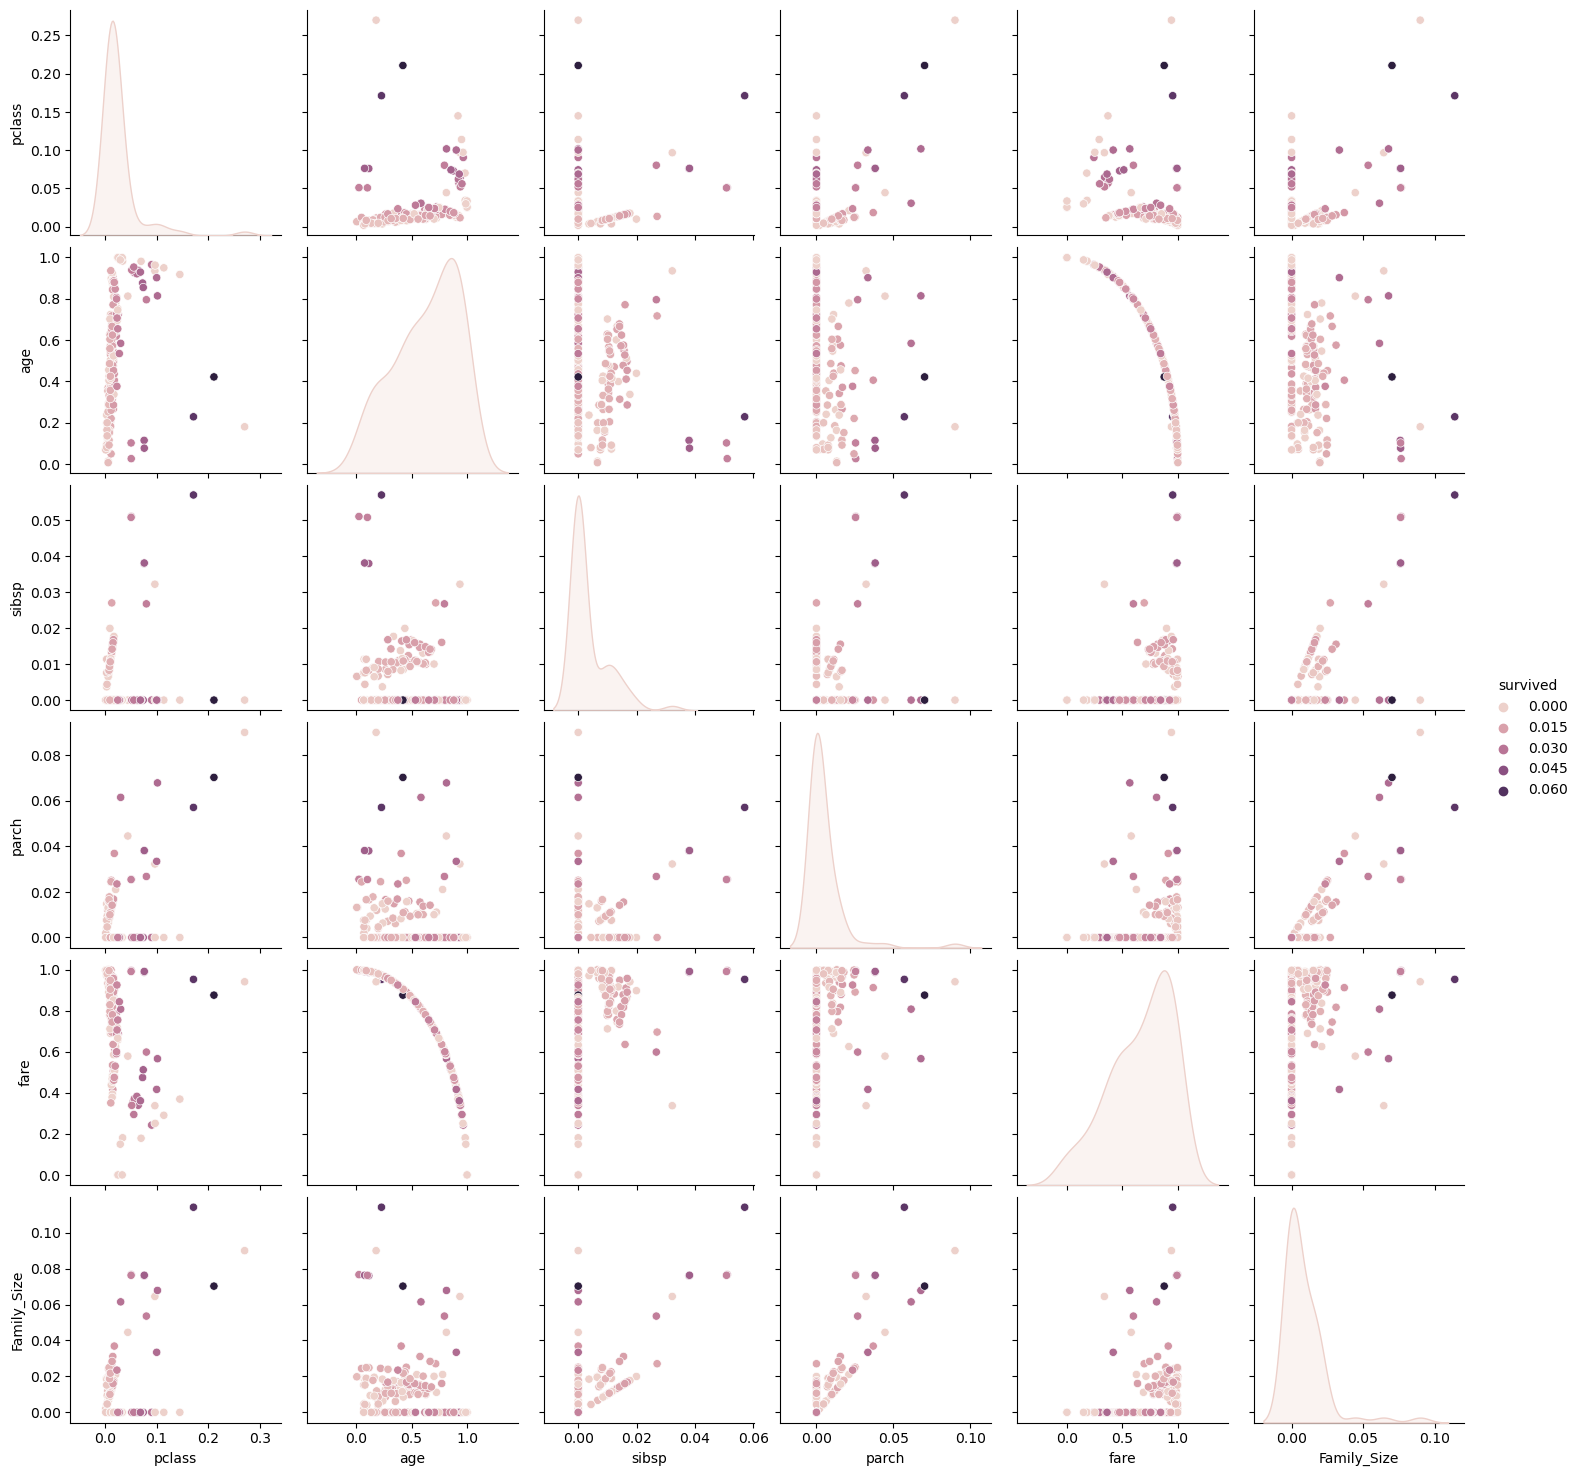

In [97]:
# Pair Plot
sns.pairplot(clean_df.select_dtypes(['number']),hue="survived")
plt.show()